<a href="https://colab.research.google.com/github/2k0v11/ML_Projects/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


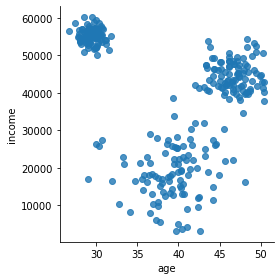

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("https://raw.githubusercontent.com/2k0v11/Dataset/main/Income%20Data.csv")
sn.lmplot("age", "income", data = df, fit_reg = False, size = 4)


In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["age", "income"]])
scaled_df[0:5]


array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(scaled_df)
df["clusterid"] = clusters.labels_
markers = ['+', '^', '*']
sn.lmplot("age", "income", data = df, hue = "clusterid", fit_reg =
False, markers = markers, size = 4)


In [ ]:
#cluster centres for average age and income of each cluster
clusters = KMeans(3)
clusters.fit(df)
df["new_clusterid"] = clusters.labels_
df.groupby("new_clusterid")['age', 'income'].agg(["mean", 
'std']).reset_index()


Text(0, 0.5, 'Sum of Squared Error')

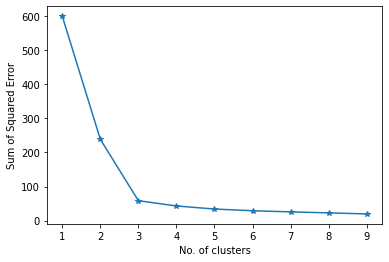

In [ ]:
#Finding optimum clusters using elbow method
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
 clusters = KMeans(num_clusters)
 clusters.fit(scaled_df)
 cluster_errors.append(clusters.inertia_)
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker = "*")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Squared Error")
